<a href="https://colab.research.google.com/github/willianszwy/Aprendizado-Supervisionado-no-Neuronio-Perceptron/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import random

# Parte I - Resolvendo um problema linearmente separável

Clonando o repositório do github que contém o data

In [ ]:
# Descomentar essa linha se der erro
#!git clone https://github.com/jesusdourado/rna-atividade2.1-data.git

In [ ]:
exemplos = np.fromfile('rna-atividade2.1-data/data/dataAll.txt').reshape(-1,3)

In [ ]:
random.seed(dt.datetime.now().time())

## Implementando o neurônio Perceptron de Rosenblatt

In [41]:
class Perceptron:

    def __init__(self, tamanho, bias = 0, taxa_aprendizado = 0.1, min_peso = -0.5, max_peso = 0.5) -> None:
        self.bias = bias
        self.taxa_aprendizado = taxa_aprendizado
        self.pesos = np.zeros(tamanho + 1)
        self.pesos[0] = random.uniform(min_peso, max_peso)
        self.pesos[1] = random.uniform(min_peso, max_peso)
        self.pesos[2] = random.uniform(min_peso, max_peso)
        self.entradas = np.empty(tamanho + 1)
        self.entradas[0] = self.bias
        self.erro = 0
        self.atualiza_pesos_contador = 0 


    def treinar(self, d):
        print("Pesos iniciais: ", self.pesos)
        epoca = 0
        continua = True
        while continua:
            epoca += 1
            print("Época: ", epoca)
            contem_erro = False
            qtd_ajustes_pesos_epoca = 0

            for i in range(d.shape[0]):

                self.entradas[1] = d[i][0]
                self.entradas[2] = d[i][1]

                y = self.predicao()
                self.calcula_erro(y, d[i][2])

                if self.erro != 0:
                    self.atualiza_pesos()
                    qtd_ajustes_pesos_epoca += 1
                    contem_erro = True      

            print("Total ajustes de pesos da época: ", qtd_ajustes_pesos_epoca)

            if not contem_erro:
                continua = False
        print("\n","="*6, "RELATÓRIO DO TREINO", "="*6)
        print("Número total de ajustes dos pesos: ", self.atualiza_pesos_contador)
        print("Número de Épocas: ", epoca)
        print("Pesos finais: ", self.pesos)

    def funcao_de_ativacao(self, x):
        return 1 if x >= 0 else 0

    def predicao(self):
        y = self.pesos.T.dot(self.entradas)
        return self.funcao_de_ativacao(y)

    def calcula_erro(self,y, yd):
        self.erro = yd - y

    def delta(self):
        return self.taxa_aprendizado * self.erro * self.entradas

    def atualiza_pesos(self):
            self.pesos =  self.pesos + self.delta()
            self.atualiza_pesos_contador += 1
            print("pesos atualizados: ",self.pesos)

    def plot_data(self,X):
        plt.figure(figsize=(10,6))
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.title("Neurônio Perceptron")
        plt.grid(True)

        for i in range(X.shape[0]):
            plt.plot(X[i][0],X[i][1],'b.' if (X[i][2] == 1) else 'r.')

        x1 = np.array([-1000, 1000])
        m = -self.pesos[1]/self.pesos[2]
        c = -self.pesos[0]/self.pesos[2]
        x2 = m*x1 + c
    
        plt.plot(x1, x2, 'k-',linewidth=2)

In [42]:
neuronio = Perceptron(2)
neuronio.treinar(exemplos)

Pesos iniciais:  [-0.06228568  0.13229182 -0.49115825]
Época:  1
pesos atualizados:  [-6.22856811e-02  7.29283118e+01  3.53384018e+01]
pesos atualizados:  [-6.22856811e-02  7.40815518e+01 -2.35096182e+01]
pesos atualizados:  [-6.22856811e-02 -9.44805818e+00 -1.22635448e+02]
pesos atualizados:  [-6.22856811e-02  3.97388018e+01 -1.06006718e+02]
pesos atualizados:  [-6.22856811e-02  1.22337502e+02 -2.61508882e+01]
pesos atualizados:  [-6.22856811e-02  8.23285918e+01 -1.04043578e+02]
pesos atualizados:  [-6.22856811e-02  1.35998402e+02 -5.49513082e+01]
pesos atualizados:  [-6.22856811e-02  8.30383418e+01 -1.11820768e+02]
pesos atualizados:  [-6.22856811e-02  1.42597862e+02 -6.16984382e+01]
pesos atualizados:  [-6.22856811e-02  1.10119872e+02 -1.35154258e+02]
pesos atualizados:  [-6.22856811e-02  1.81494382e+02 -7.06121382e+01]
pesos atualizados:  [-6.22856811e-02  1.35969752e+02 -1.36248068e+02]
pesos atualizados:  [-6.22856811e-02  2.18861622e+02 -5.34665782e+01]
pesos atualizados:  [-6.2

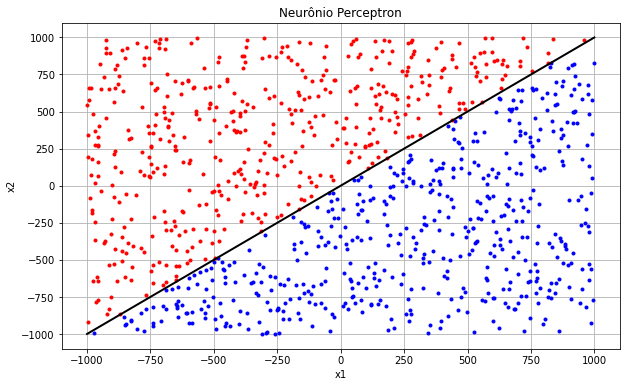

In [43]:
neuronio.plot_data(exemplos)

# Parte II - Experimentação

Calculando o identificador para ler o data**X**.txt

In [ ]:
def caminhoDados ():
  matriculas = [1715080108, 1815310070, 1515080172, 1815310027]
  soma = 0

  for m in matriculas:
    soma += m % 10

  soma = soma % 4

  return 'rna-atividade2.1-data/data/data' + str(x) + '.txt'

print(caminhoDados())

rna-atividade2.1-data/data/data1.txt


In [ ]:
exemplos = np.fromfile(caminhoDados()).reshape(-1, 3)
neuronio = Perceptron(2, -1, 0.1, -100, 100)
neuronio.treinar(exemplos)


Época:  1
pesos atualizados:  [ 30.13582833  24.84563034 -14.67315445]
pesos atualizados:  [ 30.23582833  24.73411675 -14.65324525]
pesos atualizados:  [ 30.33582833  24.62001215 -14.63567287]
pesos atualizados:  [ 30.23582833  24.71951664 -14.53677431]
pesos atualizados:  [ 30.13582833  24.81631941 -14.42447384]
pesos atualizados:  [ 30.03582833  24.93430105 -14.34381346]
pesos atualizados:  [ 29.93582833  25.0357061  -14.22513869]
pesos atualizados:  [ 29.83582833  25.15672993 -14.10909027]
pesos atualizados:  [ 29.73582833  25.24413    -13.9949335 ]
pesos atualizados:  [ 29.63582833  25.35685133 -13.89583051]
pesos atualizados:  [ 29.53582833  25.47492883 -13.79741796]
pesos atualizados:  [ 29.43582833  25.56680642 -13.71154024]
pesos atualizados:  [ 29.33582833  25.65701259 -13.6007575 ]
pesos atualizados:  [ 29.23582833  25.75538625 -13.50079489]
pesos atualizados:  [ 29.13582833  25.85585809 -13.41083308]
pesos atualizados:  [ 29.03582833  25.964913   -13.32097   ]
pesos atualiza

# Parte III - Validação *Holdout* em problema não linearmente separável